## Cloud Function Script

##### Note:
##### This cloud function script must run after you have all your GCS buckets, pipeline.yaml file

[What is cloud function](https://cloud.google.com/vertex-ai/docs/pipelines/trigger-pubsub)

### Function Configuration 

#### How to config a function listening to GCS bucket

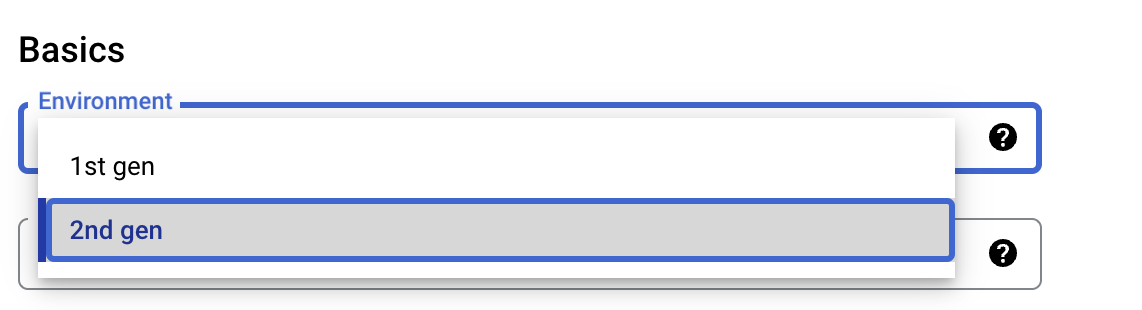
##### 2st Generation

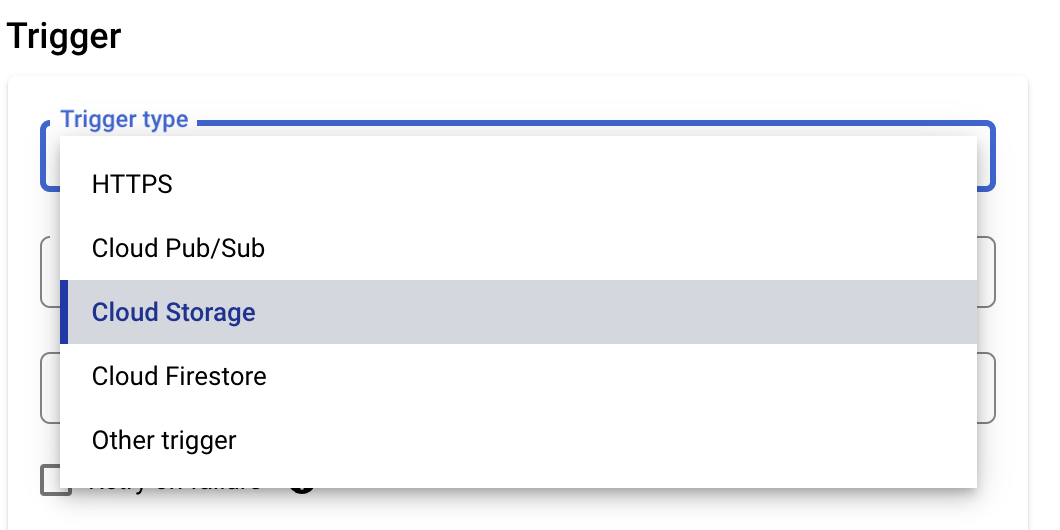
##### Select Cloud Storage under trigger section

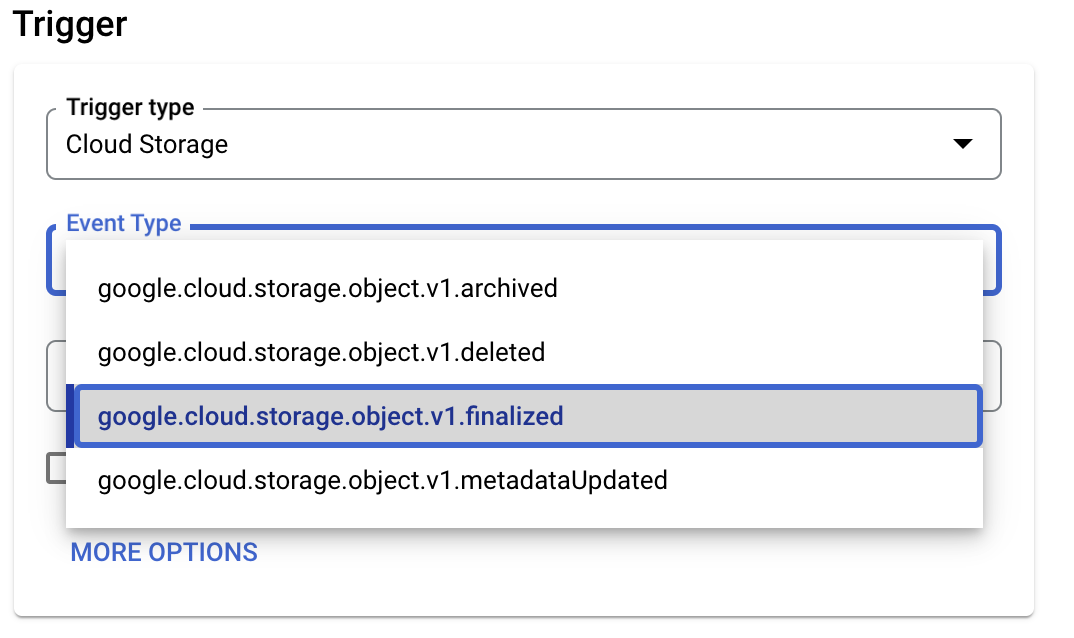
##### Further select On (finalizing/creating) file in the selected bucket in event type

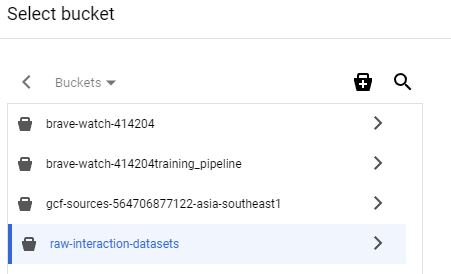
##### Then selet the bucket you want to listening after click browse

### Cloud Function

In [ ]:
# Please make sure you are running under !!!!
# Runtime : Python 3.9
# Entry point : trigger_pipeline_run

In [ ]:
import base64
import json
from google.cloud import aiplatform

PROJECT_ID = 'brave-watch-414204'                     # <---CHANGE THIS
REGION = 'asia-southeast1'                             # <---CHANGE THIS
PIPELINE_ROOT = "gs://brave-watch-414204" + "basic-pipeline" # <---CHANGE THIS

def trigger_pipeline_run(event, context):
    
    file = event
    print(f"Processing start with filename: {file['name']}")
    pipeline_spec_uri = "gs://brave-watch-414204/Pipeline_ymal/basic_pipeline.yaml"

    # Create a PipelineJob using the compiled pipeline from pipeline_spec_uri
    aiplatform.init(
        project=PROJECT_ID,
        location=REGION,
    )
    job = aiplatform.PipelineJob(
        display_name='basic-pipeline-cloud-function',
        template_path=pipeline_spec_uri,
        pipeline_root=PIPELINE_ROOT,
        enable_caching=False,
    )

    # Submit the PipelineJob
    job.submit()
    print("Processing finish")


## requirements.txt

### Add schema.yaml file into your cloud funtion folder